<a href="https://colab.research.google.com/github/sathyadithyarithi/ITI103_myClasswork/blob/main/1_Introduction_to_Machine_Learning_and_Toolkit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Machine Learning and Toolkit Exercises

## Introduction

We will be using the iris data set for this tutorial. This is a well-known data set containing iris species and sepal and petal measurements.  The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. The data we will use are in a file called `Iris_Data.csv` found in the repository.

## Question 1

Load the data from the file using the techniques learned today. Examine it.

Determine the following:

* The number of data points (rows). (*Hint:* check out the dataframe `.shape` attribute.)
* The column names. (*Hint:* check out the dataframe `.columns` attribute.)
* The data types for each column. (*Hint:* check out the dataframe `.dtypes` attribute.)

In [1]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/nyp-sit/data/master/Iris_Data.csv'
data = pd.read_csv(url)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
# Number of rows (Hint: check out the dataframe .shape attribute.)
print("Number of rows = ", data.shape)
# print Column names (Hint: check out the dataframe .columns attribute.)
print("Column names of data :\n ",data.columns)
# print Data types (Hint: check out the dataframe .dtypes attribute.)
print("Data Types of data :\n",data.dtypes)

Number of rows =  (150, 5)
Column names of data :
  Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
Data Types of data :
 sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [12]:
#@title  { display-mode: "form" }
# Number of rows
print('Number of rows: {}'.format(data.shape[0]))

# Column names
print(data.columns.tolist())

# Data types
print(data.dtypes)

Number of rows: 150
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


## Question 2

Examine the species names and note that they all begin with 'Iris-'. Remove this portion of the name so the species name is shorter.

*Hint:* there are multiple ways to do this, but you could use either the [string processing methods](http://pandas.pydata.org/pandas-docs/stable/text.html) or the [apply method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html).

In [13]:
# The str method maps the following function to each entry as a string


In [ ]:
#@title
# The str method maps the following function to each entry as a string
data['species'] = data.species.str.replace('Iris-', '')
# alternatively
# data['species'] = data.species.apply(lambda r: r.replace('Iris-', ''))

data.head()

## Question 3

Determine the following:  
* The number of each species present. (*Hint:* check out the series `.value_counts` method.)
* The mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.

*Hint:* for the last question, the `.describe` method does have median, but it's not called median. It's the *50%* quantile. `.describe` does not have range though, and in order to get the range, you will need to create a new entry in the `.describe` table, which is `max - min`.

In [ ]:
# use .value_counts() to count each species


In [ ]:
#@title
# One way to count each species
data.species.value_counts()

In [ ]:
# Select just the rows desired from the 'describe' method and add in the 'median' (Hint: check out the dataframe .rename attribute.)


In [ ]:
#@title
# Select just the rows desired from the 'describe' method and add in the 'median'
stats_df = data.describe()
stats_df = data.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['mean','25%','50%','75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

## Question 4

Calculate the following **for each species** in a separate dataframe:

* The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).
* The median of each of these measurements.

*Hint:* you may want to use Pandas [`groupby` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) to group by species before calculating the statistic.

If you finish both of these, try calculating both statistics (mean and median) in a single table (i.e. with a single groupby call). See the section of the Pandas documentation on [applying multiple functions at once](http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once) for a hint.

In [ ]:
# The mean calculation (Hint: check out the dataframe .groupby attribute.)


In [ ]:
#@title
# The mean calculation
data.groupby('species').mean()

In [ ]:
# The median calculation


In [ ]:
#@title
# The median calculation
data.groupby('species').median()

In [ ]:
# applying multiple functions at once - 2 methods


In [ ]:
#@title
# applying multiple functions at once - 2 methods

data.groupby('species').agg(['mean', 'median'])  # passing a list of recognized strings
data.groupby('species').agg([np.mean, np.median])  # passing a list of explicit aggregation functions

In [ ]:
# If certain fields need to be aggregated differently, we can do:


In [ ]:
#@title
variable_name = ""
# If certain fields need to be aggregated differently, we can do:
from pprint import pprint

agg_dict = {field: ['mean', 'median'] for field in data.columns if field != 'species'}
agg_dict['petal_length'] = 'max'
pprint(agg_dict)
data.groupby('species').agg(agg_dict)

## Question 5

Make a scatter plot of `sepal_length` vs `sepal_width` using Matplotlib. Label the axes and give the plot a title.

In [ ]:
import matplotlib.pyplot as plt
# A simple scatter plot with Matplotlib


# Label the axes


In [ ]:
#@title
import matplotlib.pyplot as plt

# A simple scatter plot with Matplotlib
ax = plt.axes()

ax.scatter(data.sepal_length, data.sepal_width)

# Label the axes
ax.set(xlabel='Sepal Length (cm)',
       ylabel='Sepal Width (cm)',
       title='Sepal Length vs Width');

## Question 6

Make a histogram of any one of the four features. Label axes and title it as appropriate.

In [ ]:
# Using Matplotlib's plotting functionality


In [ ]:
#@title
# Using Matplotlib's plotting functionality
ax = plt.axes()
ax.hist(data.petal_length, bins=25);

ax.set(xlabel='Petal Length (cm)',
       ylabel='Frequency',
       title='Distribution of Petal Lengths');

In [ ]:
#@title
# Alternatively using Pandas plotting functionality
ax = data.petal_length.plot.hist(bins=25)

ax.set(xlabel='Petal Length (cm)',
       ylabel='Frequency',
       title='Distribution of Petal Lengths');

## Question 7

Now create a single plot with histograms for each feature (`petal_width`, `petal_length`, `sepal_width`, `sepal_length`) overlayed. If you have time, next try to create four individual histogram plots in a single figure, where each plot contains one feature.

For some hints on how to do this with Pandas plotting methods, check out the [visualization guide](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html) for Pandas.

In [16]:
#Create a single plot with histograms for each feature (petal_width, petal_length, sepal_width, sepal_length) overlayed.

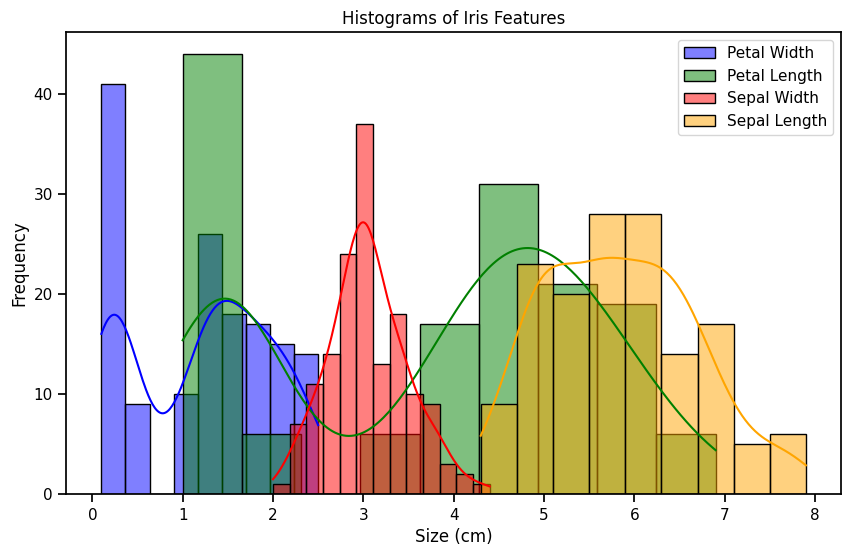

In [17]:
##  Copied from ChatGPT ###

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import pandas as pd

# Load iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Plot histograms
plt.figure(figsize=(10, 6))

# Histogram for petal width
sns.histplot(iris_df['petal width (cm)'], color='blue', label='Petal Width', kde=True)

# Histogram for petal length
sns.histplot(iris_df['petal length (cm)'], color='green', label='Petal Length', kde=True)

# Histogram for sepal width
sns.histplot(iris_df['sepal width (cm)'], color='red', label='Sepal Width', kde=True)

# Histogram for sepal length
sns.histplot(iris_df['sepal length (cm)'], color='orange', label='Sepal Length', kde=True)

# Add labels and legend
plt.xlabel('Size (cm)')
plt.ylabel('Frequency')
plt.title('Histograms of Iris Features')
plt.legend()

plt.show()

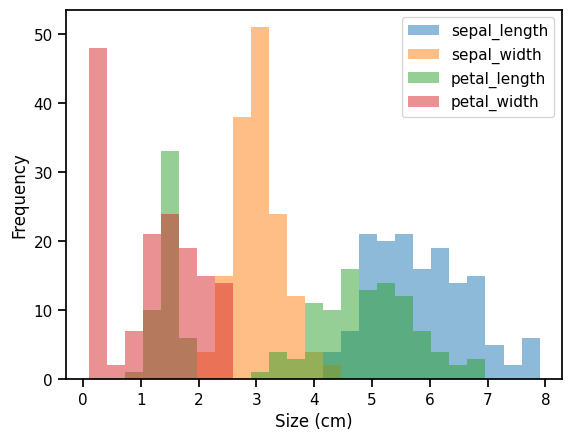

In [15]:
#@title
sns.set_context('notebook')

# This uses the `.plot.hist` method
ax = data.plot.hist(bins=25, alpha=0.5)
ax.set_xlabel('Size (cm)');

In [ ]:
#Create four individual histogram plots in a single figure, where each plot contains one feature.

## Question 8

Using Pandas, make a boxplot of each petal and sepal measurement. Here is the documentation for [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-box).

In [ ]:
# Pandas plotting functionality is pretty awesome!
# Here we have four separate plots


In [ ]:
#@title
# Pandas plotting functionality is pretty awesome!
# Here we have four separate plots

data.boxplot(by='species');

## Question 9

Now make a single boxplot where the features are separated in the x-axis and species are colored with different hues.

*Hint:* you may want to check the documentation for [Seaborn boxplots](http://seaborn.pydata.org/generated/seaborn.boxplot.html).

Also note that Seaborn is very picky about data format--for this plot to work, the input dataframe will need to be manipulated so that each row contains a single data point (a species, a measurement type, and the measurement value). Check out Pandas [stack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html) method as a starting place.

Here is an example of a data format that will work:

|   | species | measurement  | size |
| - | ------- | ------------ | ---- |
| 0	| setosa  | sepal_length | 5.1  |
| 1	| setosa  | sepal_width  | 3.5  |

In [ ]:
# First we have to reshape the data so there is
# only a single measurement in each column

In [ ]:
#@title
# First we have to reshape the data so there is
# only a single measurement in each column

plot_data = (data
             .set_index('species')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size', 'level_1':'measurement'})
            )

plot_data.head()

In [ ]:
# Now plot the dataframe from above using Seaborn

In [ ]:
#@title
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(6,4))
sns.boxplot(x='measurement', y='size',
            hue='species', data=plot_data);

## Question 10

Make a [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html) with Seaborn to examine the correlation between each of the measurements.

*Hint:* this plot may look complicated, but it is actually only a single line of code. This is the power of Seaborn and dataframe-aware plotting! See the lecture notes for reference.

In [ ]:
#@title
sns.set_context('talk')
sns.pairplot(data, hue='species');